<a href="https://colab.research.google.com/github/9392473947/Data-Analysis/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear versus Polynomial Regression


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns


In [56]:
df=pd.read_csv("https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv")

In [57]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [59]:
df.dropna(inplace=True)

In [60]:
df['model_year']=pd.to_datetime(df['model_year'],format='%y')

In [61]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,13,3,301
top,NaN,NaN,NaN,NaN,NaN,NaN,1973-01-01 00:00:00,usa,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,40,245,5
first,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,1982-01-01 00:00:00,NaN,NaN
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,NaN,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,NaN,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,NaN,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,NaN,NaN,NaN


In [62]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [63]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [64]:
df.replace({'origin':{'usa':0,'japan':1,'europe':2}},inplace=True)

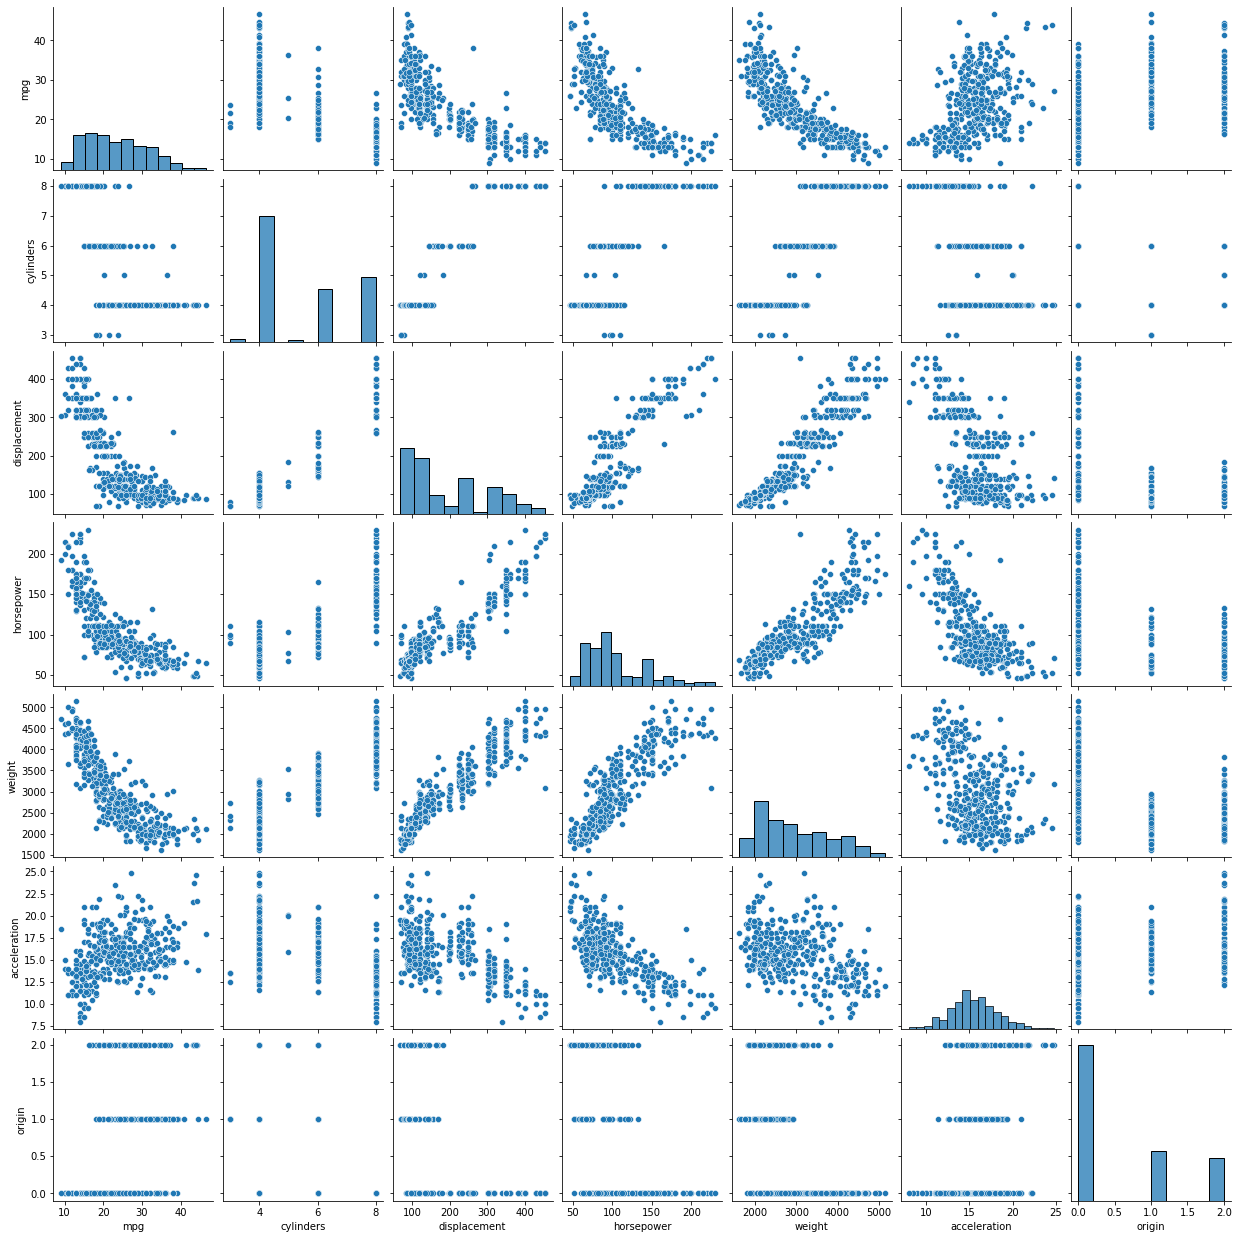

In [65]:
sns.pairplot(df)

In [66]:
df.columns


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [67]:
y=df['mpg']

In [68]:
X=df[['horsepower', 'weight']]

In [69]:
# For each X,calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor  
vif=pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF Factor,features
0,32.2,horsepower
1,32.2,weight


Train Test Split Data

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [72]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 2), (118, 2), (274,), (118,))

scaling Data

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
ss=StandardScaler()

In [75]:
X_train=ss.fit_transform(X_train)

In [76]:
X_test=ss.fit_transform(X_test)

Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
lr=LinearRegression()

In [79]:
lr.fit(X_train,y_train)

LinearRegression()

In [80]:
lr.intercept_

23.577737226277375

In [81]:
lr.coef_

array([-1.83276106, -4.89794393])

Predit Test Data

In [82]:
y_pred=lr.predict(X_test)

In [83]:
y_pred

array([19.33222089, 15.77455531, 14.84750765, 23.35409092, 29.94887915,
       23.99733343, 26.62049574, 25.01928107, 15.63586835, 11.97097841,
       23.98723917, 28.13480413, 31.99600301, 31.1463314 , 18.33381989,
       19.66726862, 28.57220745, 32.62968936, 31.38314692, 27.31339245,
       19.53280869, 23.028703  , 26.90535118, 33.04416187, 20.94045672,
        9.92313505, 21.88984527, 19.04631518, 24.60165773, 17.77935101,
       23.76210628, 17.73474697,  9.53864042, 30.05874216, 20.82634077,
       29.23733048, 24.06128299, 22.02540731, 10.93242753, 13.4654809 ,
       21.88777063, 20.88865013,  6.83697404, 18.28042493, 23.02283577,
       29.4426834 , 14.04364582, 25.74361447, 29.62987063, 22.88678746,
       22.57746467, 17.43075331, 24.04478342, 30.30944451, 10.47478389,
       10.56425109, 28.53113686, 24.39417834, 20.5270604 , 30.97085271,
       21.02100951, 26.88505902, 23.53382255, 14.70082699, 24.35677077,
       26.94906041, 16.08923314, 24.540859  , 31.11753336, 15.28

Model Accuracy

In [84]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [85]:
mean_absolute_percentage_error(y_test,y_pred)

0.15224796342732086

In [89]:
r2_score(y_test,y_pred)

0.7032406165122396

Significant Variables

In [91]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 12 Sep 2022   Prob (F-statistic):          3.06e-104
Time:                        18:45:56   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Polynomial Regression

In [92]:
from sklearn.preprocessing import PolynomialFeatures

In [93]:
poly=PolynomialFeatures()

In [94]:
X_train2=poly.fit_transform(X_train)

In [95]:
X_train2=pd.DataFrame(X_train2,columns=['bias','horsepower','weight','square of horsepower','horsepower weight','square of weight'])

In [96]:
X_train2

,bias,horsepower,weight,square of horsepower,horsepower weight,square of weight
0,1.0,3.010404,1.923330,9.062532,5.789999,3.699196
1,1.0,-0.903062,-1.150355,0.815521,1.038842,1.323317
2,1.0,-0.687147,0.704394,0.472171,-0.484022,0.496171
3,1.0,0.176515,1.273465,0.031157,0.224785,1.621713
4,1.0,0.446409,-0.049683,0.199281,-0.022179,0.002468
...,...,...,...,...,...,...
269,1.0,0.716303,1.317960,0.513090,0.944059,1.737019
270,1.0,1.795880,1.396412,3.225185,2.507789,1.949967
271,1.0,-0.363274,-0.306116,0.131968,0.111204,0.093707
272,1.0,-0.903062,-1.051997,0.815521,0.950019,1.106698


In [97]:
X_test2=poly.fit_transform(X_test)

In [100]:
X_test2=pd.DataFrame(X_test2,columns=['bias','horsepower','weight','square of horsepower','horsepower weight','square of weight'])

In [102]:
lr.fit(X_train2,y_train)

LinearRegression()

In [103]:
lr.intercept_

22.09857340631859

In [105]:
lr.coef_

array([ 0.        , -3.81240238, -4.16928337, -0.04228002,  2.21938086,
       -0.41596167])

In [106]:
y_pred_poly=lr.predict(X_test2)

In [107]:
y_pred_poly

array([17.3257649 , 15.24038935, 14.70646754, 22.90075791, 31.10555116,
       23.38253661, 25.38244167, 24.06911346, 15.15994582, 12.68680044,
       23.87902581, 27.87368857, 33.05037882, 32.613986  , 17.13617166,
       18.48135416, 29.32338237, 35.02858046, 32.5395222 , 27.05869593,
       17.9887049 , 22.2719832 , 26.57344888, 37.08774269, 19.65904345,
       13.36593241, 19.82635226, 16.96486206, 24.02373626, 11.11443268,
       23.0548243 , 16.54916058, 13.10797308, 30.64160342, 19.75989903,
       29.78914389, 22.17803043, 21.17084458, 12.92772423, 14.05644705,
       20.81227275, 18.45043023, 13.66485095, 17.09514378, 22.26564526,
       30.00445233, 14.28501281, 24.67803576, 28.86769631, 21.58338247,
       21.8261947 , 16.4370367 , 23.0311763 , 31.40284597, 12.69476739,
       13.14683119, 29.27766006, 23.93260381, 19.03055336, 32.62761175,
       19.84787585, 25.77879783, 22.88216068, 14.62138433, 22.18977336,
       25.66582961, 15.42533356, 24.09287241, 32.79104256, 14.95

Model Accuracy

In [108]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

In [109]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.13053963468368052

In [111]:
r2_score(y_test,y_pred_poly)

0.7427946235072436